## Applied Machine Learning

### Project 1

In this class, we have worked to understand both general principles of machine learning methods and specific details of particular machine learning techniques. For this project, you will apply what you have learned in this course to formulate and answer your own question.

**Important:** Be sure to include code and answers in the correct cells of the notebook. Otherwise you might not get full credit for your work.

Please use this notebook to turn in your work. 

Points: 20

You will be graded based on:
1. __Technical completeness__. _(12 points)_ 

Did you meet the technical requirements for the project? For instance, did you describe hyperparameter tuning and include plots, where necessary.

2. __Creativity, imagination and ambition__. _(3 points)_ 

Did you form an interesting, creative and ambitious question, and explain why it is important to answer that question?

_Note: downloading a ready-made dataset you find online (e.g. on Kaggle) and answering a question that is already defined for you will make it hard to get full points for creativity, imagination and ambition. (Unless you do something else interesting and ambitious, e.g. analyze attributes of a specific model very closely.) To get full points for creativity/imagination/ambition you will need to think a little a bit more. The bar will be higher for 5604 students._

3. __Presentation__. _(5 points)_ 

Did you do a good job presenting your results? Would your notebook make sense to a person who was not familiar with your project? You should take time to write clearly, simplify your code and explain what you are doing in your notebook. At minimum:

- Make sure your plots are well-labeled and appropriately scaled, delete code that does not work correctly, and be sure to mix code and text so that readers can easily understand your work. 
- Check out [this](https://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/) blog post for a nice example of how to present a data analysis clearly.
- Put yourself in the reader's shoes. What would be confusing? Annoying? Helpful?

## Question 

_Using this cell, please write a short, clear paragraph explaining what question you plan to answer in this notebook. Your question can be narrow (e.g. can we predict a dog's height from its weight) or broad (e.g. what features are important or unimportant in predicting the price of a house). Briefly describe why your question is important and how you plan to answer. Be sure to explain what is imaginative, creative or ambitious about your planned work! For instance, will you spend a lot of time defining new features, will you be working with hard-to-get data, will your work inform a major theoretical debate? Be sure to ask a question you can actually start to answer using machine learning techniques!_

- Easily one of the best basketball players to ever live, LeBron James has many people in awe of his abilities. A combination if his insane physical abilities and high basketball IQ make him a force to be reckoned with on the wood floor. Looking at LeBron's magnificent career, I thought it would be cool to create a model based on his points, assists, rebounds, steals, blocks, turnovers, field goal percentage and number of minutes played, ato predict whether his side would win a matchup. This is an important question to ask, one can use these numbers to find a numeric correlation to LeBron's numbers and the influence he has on a match. We can analyze where his contributions are making the most impact in order to cause him to win so much.

## Data

_Using this cell, please write a short, clear paragraph explaining what data you will use to answer your question. You do not need to go gather custom datasets for this class, although you are welcome to do so. Just downloading data from Kaggle is fine, although you are highly encouraged to think a little harder and more creatively when you do the project. There are many, many places to find interesting datasets online related to many topics like music, politics, sports, transportation, etc. Data gathering is one way to make your project more creative, but you are not necessarily expected to take on a major data gathering effort. If applicable, describe how you plan to split between the training and test sets. You might want to check out Google's [dataset search](https://datasetsearch.research.google.com/)_

- I will be using the NBA API python library that features a vast repository of basketball data. I will used this scraped material to collect statistics on every game that LeBron has played in his career. I will 70% of the data for training, and 30% for testing.

#### Data preprocessing

In [143]:
import time
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt 
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll

In [144]:
gamelog_lebron = playergamelog.PlayerGameLog(player_id='2544', season=SeasonAll.all)
gamelog_lebron_df = gamelog_lebron.get_data_frames()[0]
LeBron_Stats = gamelog_lebron_df[['PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV', 'MIN', 'FG_PCT', 'WL']][::-1]
LeBron_Stats["WL"].replace({"W": 1, "L": 0}, inplace=True)
time.sleep(.600)

- Here is our final dataframe:

In [55]:
print(LeBron_Stats)

      PTS  AST  REB  STL  BLK  TOV  MIN  FG_PCT  WL
1309   25    9    6    4    0    2   42   0.600   0
1308   21    8   12    1    0    7   41   0.471   0
1307    8    6    4    2    0    2   39   0.250   0
1306    7    7   11    2    3    2   41   0.273   0
1305   23    3    5    0    0    7   44   0.444   0
...   ...  ...  ...  ...  ...  ...  ...     ...  ..
4      10    4    1    0    0    1   11   0.500   0
3      16    7    8    2    1    5   32   0.500   0
2      19    6    7    0    0    5   28   0.545   0
1      24    8    7    0    0    4   28   0.500   1
0      25    6    1    3    0    2   27   0.500   1

[1310 rows x 9 columns]


In [56]:
LeBron_Stats.to_csv('Lebron_Stats.csv')

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model

percentage of losses 33.664122137404576
percentage of wins 66.33587786259541


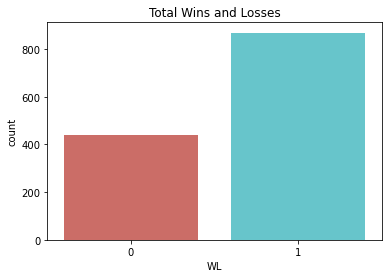

In [61]:
sns.countplot(x='WL', data=Lebron_stats, palette='hls').set_title("Total Wins and Losses")
l = len(Lebron_stats[Lebron_stats['WL']==0])
w = len(Lebron_stats[Lebron_stats['WL']==1])
pct_l = l/(l+w)
print("percentage of losses", pct_l*100)
pct_w = w/(l+w)
print("percentage of wins", pct_w*100)

In [62]:
Lebron_stats['WL'].value_counts()

1    869
0    441
Name: WL, dtype: int64

Training percentage of losses 35.32934131736527
Training percentage of wins 66.57917760279966


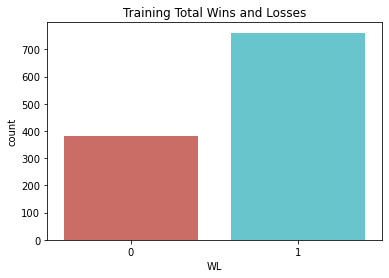

In [67]:
sns.countplot(x='WL', data=Lebron_train, palette='hls').set_title("Training Total Wins and Losses")
l_train = len(Lebron_train[Lebron_train['WL']==0])
w_train = len(Lebron_train[Lebron_train['WL']==1])
pct_l_train = l/(l+w)
print("Training percentage of losses", pct_l_train*100)
pct_w_train = w_train/(l_train+w_train)
print("Training percentage of wins", pct_w_train*100)

In [64]:
Lebron_train['WL'].value_counts()

1    761
0    382
Name: WL, dtype: int64

percentage of losses 35.32934131736527
percentage of wins 64.67065868263472


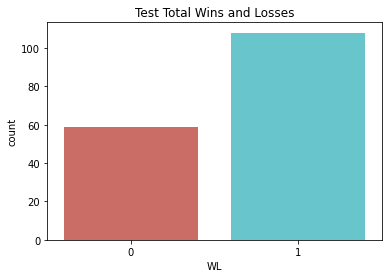

In [68]:
sns.countplot(x='WL', data=Lebron_test, palette='hls').set_title("Test Total Wins and Losses")
l_test = len(Lebron_test[Lebron_test['WL']==0])
w_test = len(Lebron_test[Lebron_test['WL']==1])
pct_l_test = l_test/(l_test+w_test)
print("percentage of losses", pct_l_test*100)
pct_w_test = w_test/(l_test+w_test)
print("percentage of wins", pct_w_test*100)

In [69]:
Lebron_test['WL'].value_counts()

1    108
0     59
Name: WL, dtype: int64

In [79]:
Lebron_stats.groupby('WL').mean()

,Unnamed: 0,PTS,AST,REB,STL,BLK,TOV,MIN,FG_PCT
WL,,,,,,,,,
0,701.362812,25.682540,6.668934,7.063492,1.394558,0.668934,3.907029,39.190476,0.462220
1,630.718067,27.665132,7.773303,7.636364,1.666283,0.790564,3.301496,37.719217,0.526924


In [76]:
Lebron_train.groupby('WL').mean()

,Unnamed: 0,PTS,AST,REB,STL,BLK,TOV,MIN,FG_PCT
WL,,,,,,,,,
0,796.10733,25.921466,6.382199,6.942408,1.460733,0.693717,3.913613,39.916230,0.459746
1,708.83180,27.773982,7.582129,7.572930,1.717477,0.818660,3.247043,38.183968,0.528640


In [77]:
Lebron_test.groupby('WL').mean()

,Unnamed: 0,PTS,AST,REB,STL,BLK,TOV,MIN,FG_PCT
WL,,,,,,,,,
0,87.932203,24.135593,8.525424,7.847458,0.966102,0.508475,3.864407,34.491525,0.478237
1,80.305556,26.898148,9.120370,8.083333,1.305556,0.592593,3.685185,34.444444,0.514833


In [ ]:
plt.scatter(x_train,y_train)
plt.xlabel("Credit Balance")
plt.ylabel("Probability of Default")

In [75]:
mean_loss_pct = (pct_l + pct_l_train + pct_l_test) / 3
mean_win_pct = (pct_w + pct_w_train + pct_w_test) / 3
print(f"Loss Average {mean_loss_pct * 100}")
print(f"Win Average {mean_win_pct * 100}")

Loss Average 35.32934131736527
Win Average 65.30683165602304


 ### Important Observations
 - LeBron's win loss average ratio is approximately 65:35
 - In matches where LeBron 
 - LeBron scores between 26.8 & 27.7 points on average in matches that he wins
 - In games that LeBron wins, his averge field goal percente is at nearly about 51%+

## Model selection and tuning

_Using this cell, please write a short, clear paragraph explaining how you selected and tuned your model for the project. You must answer the following questions in this cell (1) Why is your model an appropriate choice for your data? (2) What hyperparameters does your model have and how did you select them? (3) What features did you choose and why?_

Your answer here

In [137]:
X_train_pts, X_test_pts, y_train_pts, y_test_pts = train_test_split(Lebron_stats[['PTS']],Lebron_stats.WL,train_size=0.3)
X_train_ast, X_test_ast, y_train_ast, y_test_ast = train_test_split(Lebron_stats[['AST']],Lebron_stats.WL,train_size=0.3)
X_train_fg, X_test_fg, y_train_fg, y_test_fg = train_test_split(Lebron_stats[['FG_PCT']],Lebron_stats.WL,train_size=0.3)
X_train_min , X_test_min, y_train_min, y_test_min = train_test_split(Lebron_stats[['MIN']],Lebron_stats.WL,train_size=0.3)


In [140]:
model_pts = LogisticRegression()

model_pts.fit(X_train_pts, y_train_pts)
p = model.score(X_test_pts,y_test_pts)

print(f"Points to win accuracy: {p * 100}%")

model_ast.fit(X_train_ast, y_train_ast)
t = model.score(X_test_ast,y_test_ast)

print(f"Assist to win accuracy: {t * 100}%")

model_pts.fit(X_train_pts, y_train_pts)
fg = model.score(X_test_fg,y_test_fg)

print(f"Field Goal Percentage to win accuracy: {fg * 100}%")

Points to win accuracy: 68.04798255179935%
Assist to win accuracy: 36.53217011995638%
Field Goal Percentage to win accuracy: 33.042529989094874%


## Results

_Using this cell, please write a short, clear paragraph explaining your results. In this class, we have mostly focused on accuracy. It is OK to measure your results in another quantitative way (e.g. precision or likelihood). Whatever you pick, make sure you are clear on what you are doing, and make sure you explain why your measurement of success makes sense._

- Here we have attempted to answer whether doing a combination of the the points and assists to find the model accuracy would actually improve the accuracy. It did not do that. We even attempted to try 1000 different itereartions and the accuracy dropped as well, as portrayed on the graph

In [203]:
final = pd.read_csv('Lebron_Stats.csv')
X = final.iloc[:,[1,2]].values
y = final.iloc[:,9].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(f"Point and Assist Accuracy: {accuracy_score(y_test, y_pred) * 100}%")

Point and Assist Accuracy: 66.46341463414635%


/Users/jabam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jabam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

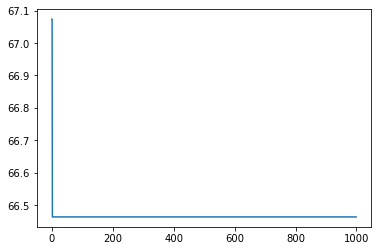

In [209]:
acc = []
it = []
for i in range(0, 1000):
    X = final.iloc[:,[1,2]].values
    y = final.iloc[:,9].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    classifier = LogisticRegression(random_state=0, max_iter = i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred) * 100)
    it.append(i)
# plt.scatter(it, acc)

fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 1000, 10)
ax.plot(it, acc)

## Error analysis

_Using this cell, please write a short, clear paragraph explaining what errors your model seems to be making, and offer a brief explanation based on your code below._

- The model is probably getting errors, as it seems that trying to only determine win and loss from just points and assists may not give a totally accurate representation of whether LeBron will win or not. The numbers are quite noisy, so trying to classify this problem might prove to be a bit harder than I thought. I think the addition of of minutes and field goals might help. but I'm not too sure how to implement this. 

## Summary and conclusion

_Using this cell, please write a short, clear paragraph describing how your results answer or do not answer your question. What new questions arise from your work? It's OK to use bullet points._

Despite the messiness of this notebook, my question was answered; attempting to use both LeBron's points and Assist to determine a win did not improve the accuracy as I has hypothesized. Overall, this was a fun project to poke at. It was quite challenging, but I believe it is a good step into the right direction of my Machine Learning journey.